# Capstone 1 Exploratory Data Analysis
This is the Jupyter notebook for the exploratory data analysis portion of my first Springboard capstone project for their Data Science Career Track Course. The goal of this project is to write an algorithm that will classify songs by decade based purely on their lyrical content. This data being used for this project is the lyrics of songs from the yearly Billboard Top 100 between the years of 1965-2015 which were obtained from https://www.kaggle.com/rakannimer/billboard-lyrics. 

# The Story So Far
Up to know I have spent my time working on this project cleaning data and turning it into more useful forms for using machin learning algorithms. The lyrics were tokenized and had stopwords removed, and some various simple EDA was done in my data story part of the project. The last thing that was done was the data was that tf-idf data was calculated for each word in the data and put into a dataframe containing exclusively that data. I also did some observations of important words from the dataset, and looked at the top ten tf-idf value means of words of each decade in the data story document.

# In This Document
In this document I will be analyzing the tf-idf data of the dataset for any interesting patterns, primarily looking for significant differences in trends of words across decades, in order to try to get a better idea of how word usage has changed over time. I'm assuming this task will be fruitful considering if it is not it may be difficult to say these tf-idf features will be useful in predicting which decade lysrics are from.

In [1]:
# Importing most of the important libraries for work in this document
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# using default seaborn formatting for plots.
sns.set()

In [3]:
# Importing the datasets
songs = pd.read_csv('basedata.csv')
tf_data = pd.read_csv('tfdata.csv')

In [4]:
songs = songs.drop('Unnamed: 0', axis=1)

In [5]:
tf_data = tf_data.drop('Unnamed: 0', axis=1)

# Presenting the Data
The next two cells are simply going to show the head of the two data frames. The first dataframe is there primarily to provide context for the second. The first frame is the original data from the dataset(with tokens added), while the second frame is the tf-idf data generated from that data.

In [6]:
songs.head()

,Rank,Song,Artist,Year,Lyrics,Decade,Tokens
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,1960,"['sam', 'sham', 'miscellaneous', 'wooly', 'bul..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1960,"['sugar', 'pie', 'honey', 'bunch', 'know', 'lo..."
2,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1960,"['woke', 'morning', 'mind', 'mind', 'got', 'tr..."
3,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1960,"['never', 'close', 'eyes', 'anymore', 'kiss', ..."
4,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1960,"['alone', 'life', 'making', 'lonely', 'always'..."


In [7]:
tf_data.head()

,able,accept,aching,across,act,actin,acting,action,add,addicted,...,yesterday,yet,yo,york,young,younger,yup,zero,zone,Decade
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960


As we can see, the tf-idf data is full of NaN values, mainly due to the fact that that is the nature of the sparse data frame, considering if the word does not occur in the song, its value is NaN. Moeving forward, let us look at some aggregate statistics to start out with across decades.

# Observing 'love'
Previous analysis of this dataset has shown that 'love' is easily the most common word in the dataset. We also observed that love has seemingly decreased in popularity across decades over time. It may be useful to gain insight into this idea, as if the importance of love has changed over time significantly, it may mean that other words could follow similar patterns. 

Text(0, 0.5, 'tf-idf Mean')

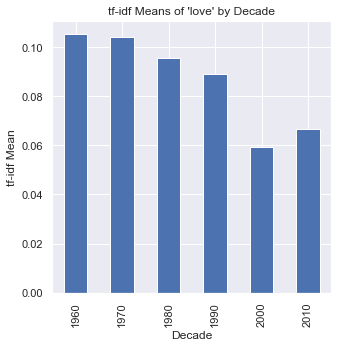

In [8]:
plt.rcParams["figure.figsize"] = (5,5)
love_means = tf_data['love'].groupby(tf_data.Decade).mean().plot(kind='bar')
plt.title("tf-idf Means of 'love' by Decade")
plt.ylabel('tf-idf Mean')

Observing this graph we see the drop in importance of the word 'love' in songs across decades, which seems gradual until the harsh drop in 2000's music, along with a slight increase from the 2000's to the 2010's. Lest us observe if there is a statistically significant difference in the usage of 'love' in songs by comparing our time period ends to each other, the 1960's and the 2010's.

# An Experiment
I would like to perform a hypothesis test to determine if the tf-idf mean of 'love' in the 1960's is significantly different from the mean of 'love' in 2010. 

Null hypothesis - The tf-idf mean of 'love' in 1960 is a the same as the tf-idf mean of love in 2010 form our data.

Alternative hypothesis - The tf-idf mean of love between the two decades is different.

I woult like to use a T-test for this, with alpha set at 0.05.

In [9]:
# pulling values for 'love' out of the data
l60 = tf_data.loc[tf_data.Decade == 1960]['love']
l10 = tf_data.loc[tf_data.Decade == 2010]['love']

In [10]:
l60.mean()

0.10559706413408651

In [11]:
l10.mean()

0.06664603699669688

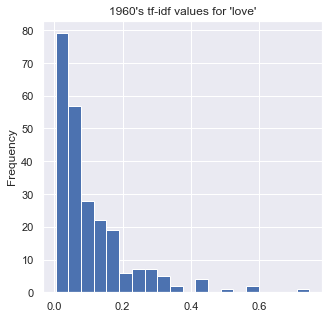

In [27]:
# create histograms of 'love' tf-idf data for both decades
l60_hist = l60.plot(kind='hist', bins=20, title = "1960's tf-idf values for 'love'")


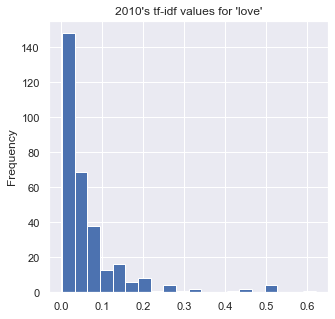

In [28]:
l10_hist = l10.plot(kind='hist', bins=20, title = "2010's tf-idf values for 'love'")

The histograms show us that our data is exponentially distributed. I would like to perform a T-test for the difference of means, which means I need data that is normall distributed. To accomplish this I am going to take the log of the data and observe how it is distributed.

In [14]:
# setting up data and taking the log
l60l = l60[~np.isnan(l60)]
l60l = np.log(l60l)
l10l = l10[~np.isnan(l10)]
l10l = np.log(l10l)

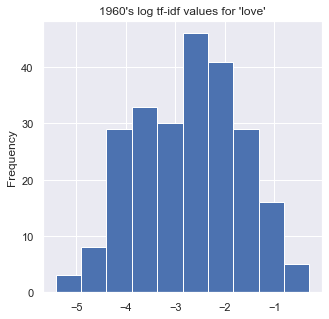

In [30]:
l60l.plot(kind='hist', title = "1960's log tf-idf values for 'love'")

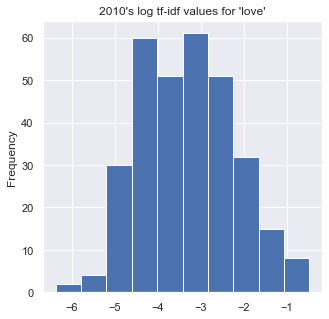

In [29]:
l10l.plot(kind='hist', title = "2010's log tf-idf values for 'love'")

Observing these new histograms of the log data, both of these sets of data seems normally distibuted, which means we can perform a T-test with this data to test our hypothesis. 

In [17]:
deg_free = len(l60l) + len(l10l) -2
print("Degrees of freedom = " + str(deg_free))

Degrees of freedom = 552


In [18]:
#importing the T-test function from scipy
from scipy.stats import ttest_ind

In [19]:
#calculating the t statistic
t_stat, p_val = ttest_ind(l60l, l10l)
print('t = ' + str(t_stat))
print('p = ' + str(p_val))

t = 6.572452543042203
p = 1.1472938647980982e-10


Obseving our results, we see we do have a statistically significant difference of means, so it should be reasonable to reject our null hypothesis that the tf-idf means of love between these two decades is the same.

# Another Observation
After working with love, the most popular word in the data set, I'm interested if there are patterns in another word: 'naturally'. 'Naturally' had the highest tf-idf mean for the 2010's, and I'd like to see its popularity in decades before. 

Text(0, 0.5, 'tf-idf Mean')

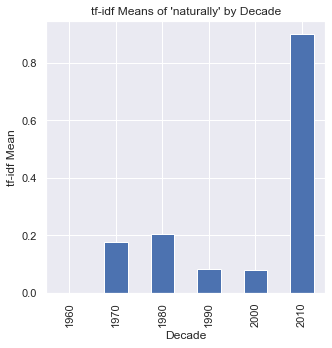

In [20]:
naturally_means = tf_data['naturally'].groupby(tf_data.Decade).mean().plot(kind='bar')
plt.title("tf-idf Means of 'naturally' by Decade")
plt.ylabel('tf-idf Mean')

This is incredibly surprising to me, and without having done any other looking, seems quite suspicious as some outlier, so let us look into that. 

In [21]:
#pulling out the naturally data for 2010's
nat10 = tf_data.loc[tf_data.Decade==2010]['naturally']
nat10 = nat10[~np.isnan(nat10)]
nat10

4334    0.900317
Name: naturally, dtype: float64

In [22]:
# pulling outsame values from the 2000's for comparison
nat20 = tf_data.loc[tf_data.Decade==2000]['naturally']
nat20 = nat20[~np.isnan(nat20)]
nat20

3321    0.061424
3368    0.048385
3727    0.129562
3846    0.074115
Name: naturally, dtype: float64

In [23]:
songs.iloc[4334]

Rank                                                     77
Song                                              naturally
Artist                              selena gomez  the scene
Year                                                   2010
Lyrics    how you choose to express yourself its all you...
Decade                                                 2010
Tokens    ['choose', 'express', 'tell', 'comes', 'natura...
Name: 4334, dtype: object

Although I tend to overuse the word 'interesting', I do find this to be incredibly interesting, and a good anecdote for how mean values can be misleading in analysis. I did not expect the song that caused this to literally be called 'Naturally'. I'm curious as to whether or not all of the visualizations I made when looking at the tf-idf means of the decades were tainted with situations like this, but I think that would require a bit more effort than it was worth for not enough gain in terms of anaytical information. This was enlightening though, as having knowledge of these types of outliers can assist with creating models, and unserstanding why errors may be made by models

# Moving Forward
With these new insights, I will be moving forward to model construction in my project. The first thing that I do in my model construction will most likely be principal component analysis, as that may help to minimize the noise generated by the types of outliers we just observed, as well as absorbing the information from words that follow trends like we observed from 'love'. It will be interesting to observe how the model may deal with the noise, if more words end up like 'naturally' as opposed to 'love'.